# Exploratory Data Analysis

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load full datasets
bottle_data = pd.read_csv('Datasets/194903-202105_Bottle.csv', encoding='latin1')
cast_data = pd.read_csv('Datasets/194903-202105_Cast.csv', encoding='latin1')

/var/folders/bk/6zsdr_0d5tbb4ggk0ngc_l940000gn/T/ipykernel_17608/374561893.py:6: DtypeWarning: Columns (47,61) have mixed types. Specify dtype option on import or set low_memory=False.
  bottle_data = pd.read_csv('Datasets/194903-202105_Bottle.csv', encoding='latin1')
/var/folders/bk/6zsdr_0d5tbb4ggk0ngc_l940000gn/T/ipykernel_17608/374561893.py:7: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  cast_data = pd.read_csv('Datasets/194903-202105_Cast.csv', encoding='latin1')


In [34]:
# Database Data Types and Columns
bottle_data.shape
bottle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895371 entries, 0 to 895370
Data columns (total 62 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              895371 non-null  int64  
 1   Btl_Cnt              895371 non-null  int64  
 2   Sta_ID               895371 non-null  object 
 3   Depth_ID             895371 non-null  object 
 4   Depthm               895371 non-null  int64  
 5   T_degC               884402 non-null  float64
 6   Salnty               848015 non-null  float64
 7   O2ml_L               725630 non-null  float64
 8   STheta               842675 non-null  float64
 9   O2Sat                690746 non-null  float64
 10  Oxy_µmol/Kg          690698 non-null  float64
 11  BtlNum               138967 non-null  float64
 12  RecInd               895371 non-null  int64  
 13  T_prec               884408 non-null  float64
 14  T_qual               24016 non-null   float64
 15  S_prec           

In [36]:
cast_data.shape
cast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35644 entries, 0 to 35643
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cst_Cnt      35644 non-null  int64  
 1   Cruise_ID    35644 non-null  object 
 2   Cruise       35644 non-null  int64  
 3   Cruz_Sta     35644 non-null  int64  
 4   DbSta_ID     35644 non-null  int64  
 5   Cast_ID      35644 non-null  object 
 6   Sta_ID       35644 non-null  object 
 7   Quarter      35644 non-null  int64  
 8   Sta_Code     35644 non-null  object 
 9   Distance     20954 non-null  float64
 10  Date         35644 non-null  object 
 11  Year         35644 non-null  int64  
 12  Month        35644 non-null  int64  
 13  Julian_Date  35644 non-null  int64  
 14  Julian_Day   35644 non-null  int64  
 15  Time         35320 non-null  object 
 16  Lat_Dec      35644 non-null  float64
 17  Lat_Deg      35644 non-null  int64  
 18  Lat_Min      35644 non-null  float64
 19  Lat_

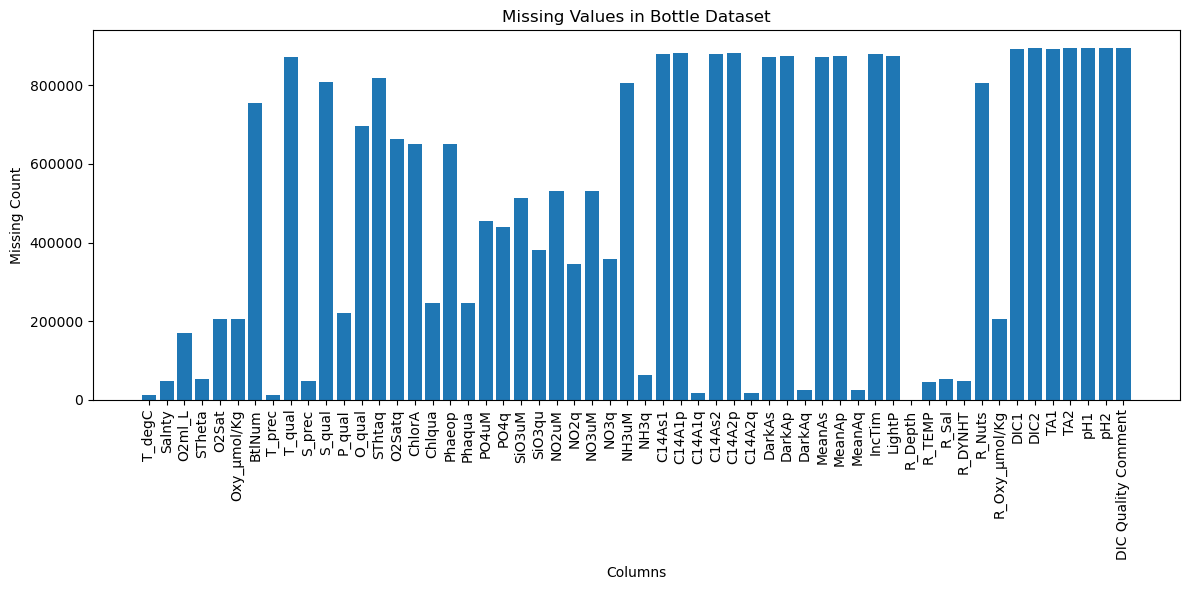

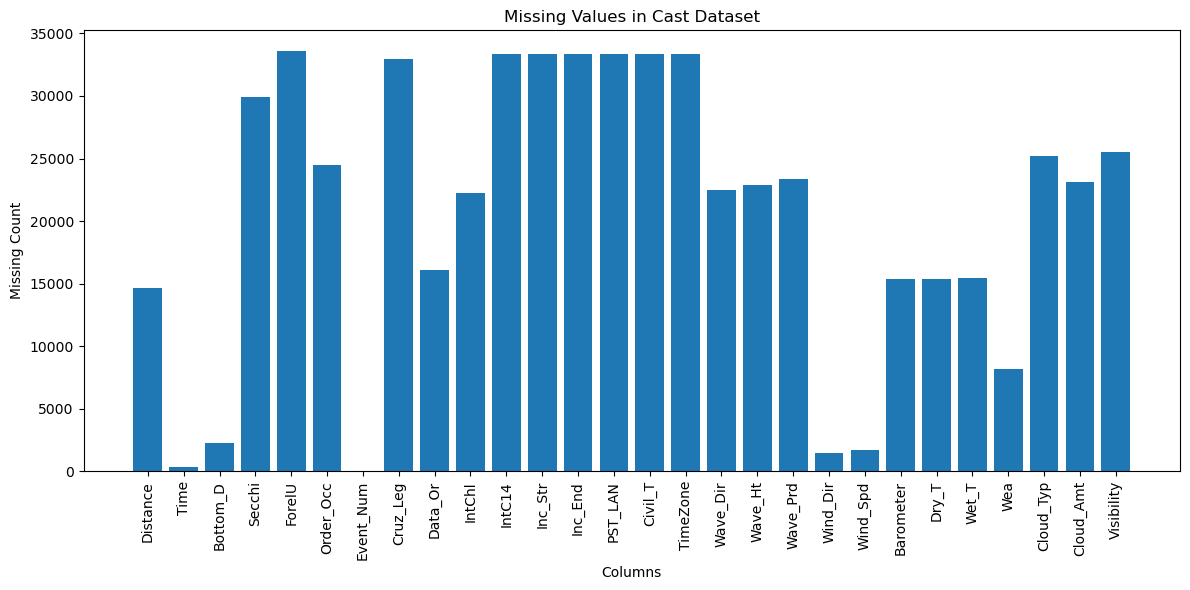

In [27]:
# Create tables of missing values for each dataset
bottle_missing = bottle_data.isnull().sum().reset_index()
bottle_missing.columns = ['Column', 'Missing Count']
bottle_missing = bottle_missing[bottle_missing['Missing Count'] > 0]

cast_missing = cast_data.isnull().sum().reset_index()
cast_missing.columns = ['Column', 'Missing Count']
cast_missing = cast_missing[cast_missing['Missing Count'] > 0]

# Plot bar graphs for missing values
plt.figure(figsize=(12, 6))
plt.bar(bottle_missing['Column'], bottle_missing['Missing Count'])
plt.title('Missing Values in Bottle Dataset')
plt.xlabel('Columns')
plt.ylabel('Missing Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(cast_missing['Column'], cast_missing['Missing Count'])
plt.title('Missing Values in Cast Dataset')
plt.xlabel('Columns')
plt.ylabel('Missing Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x109aabc40> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

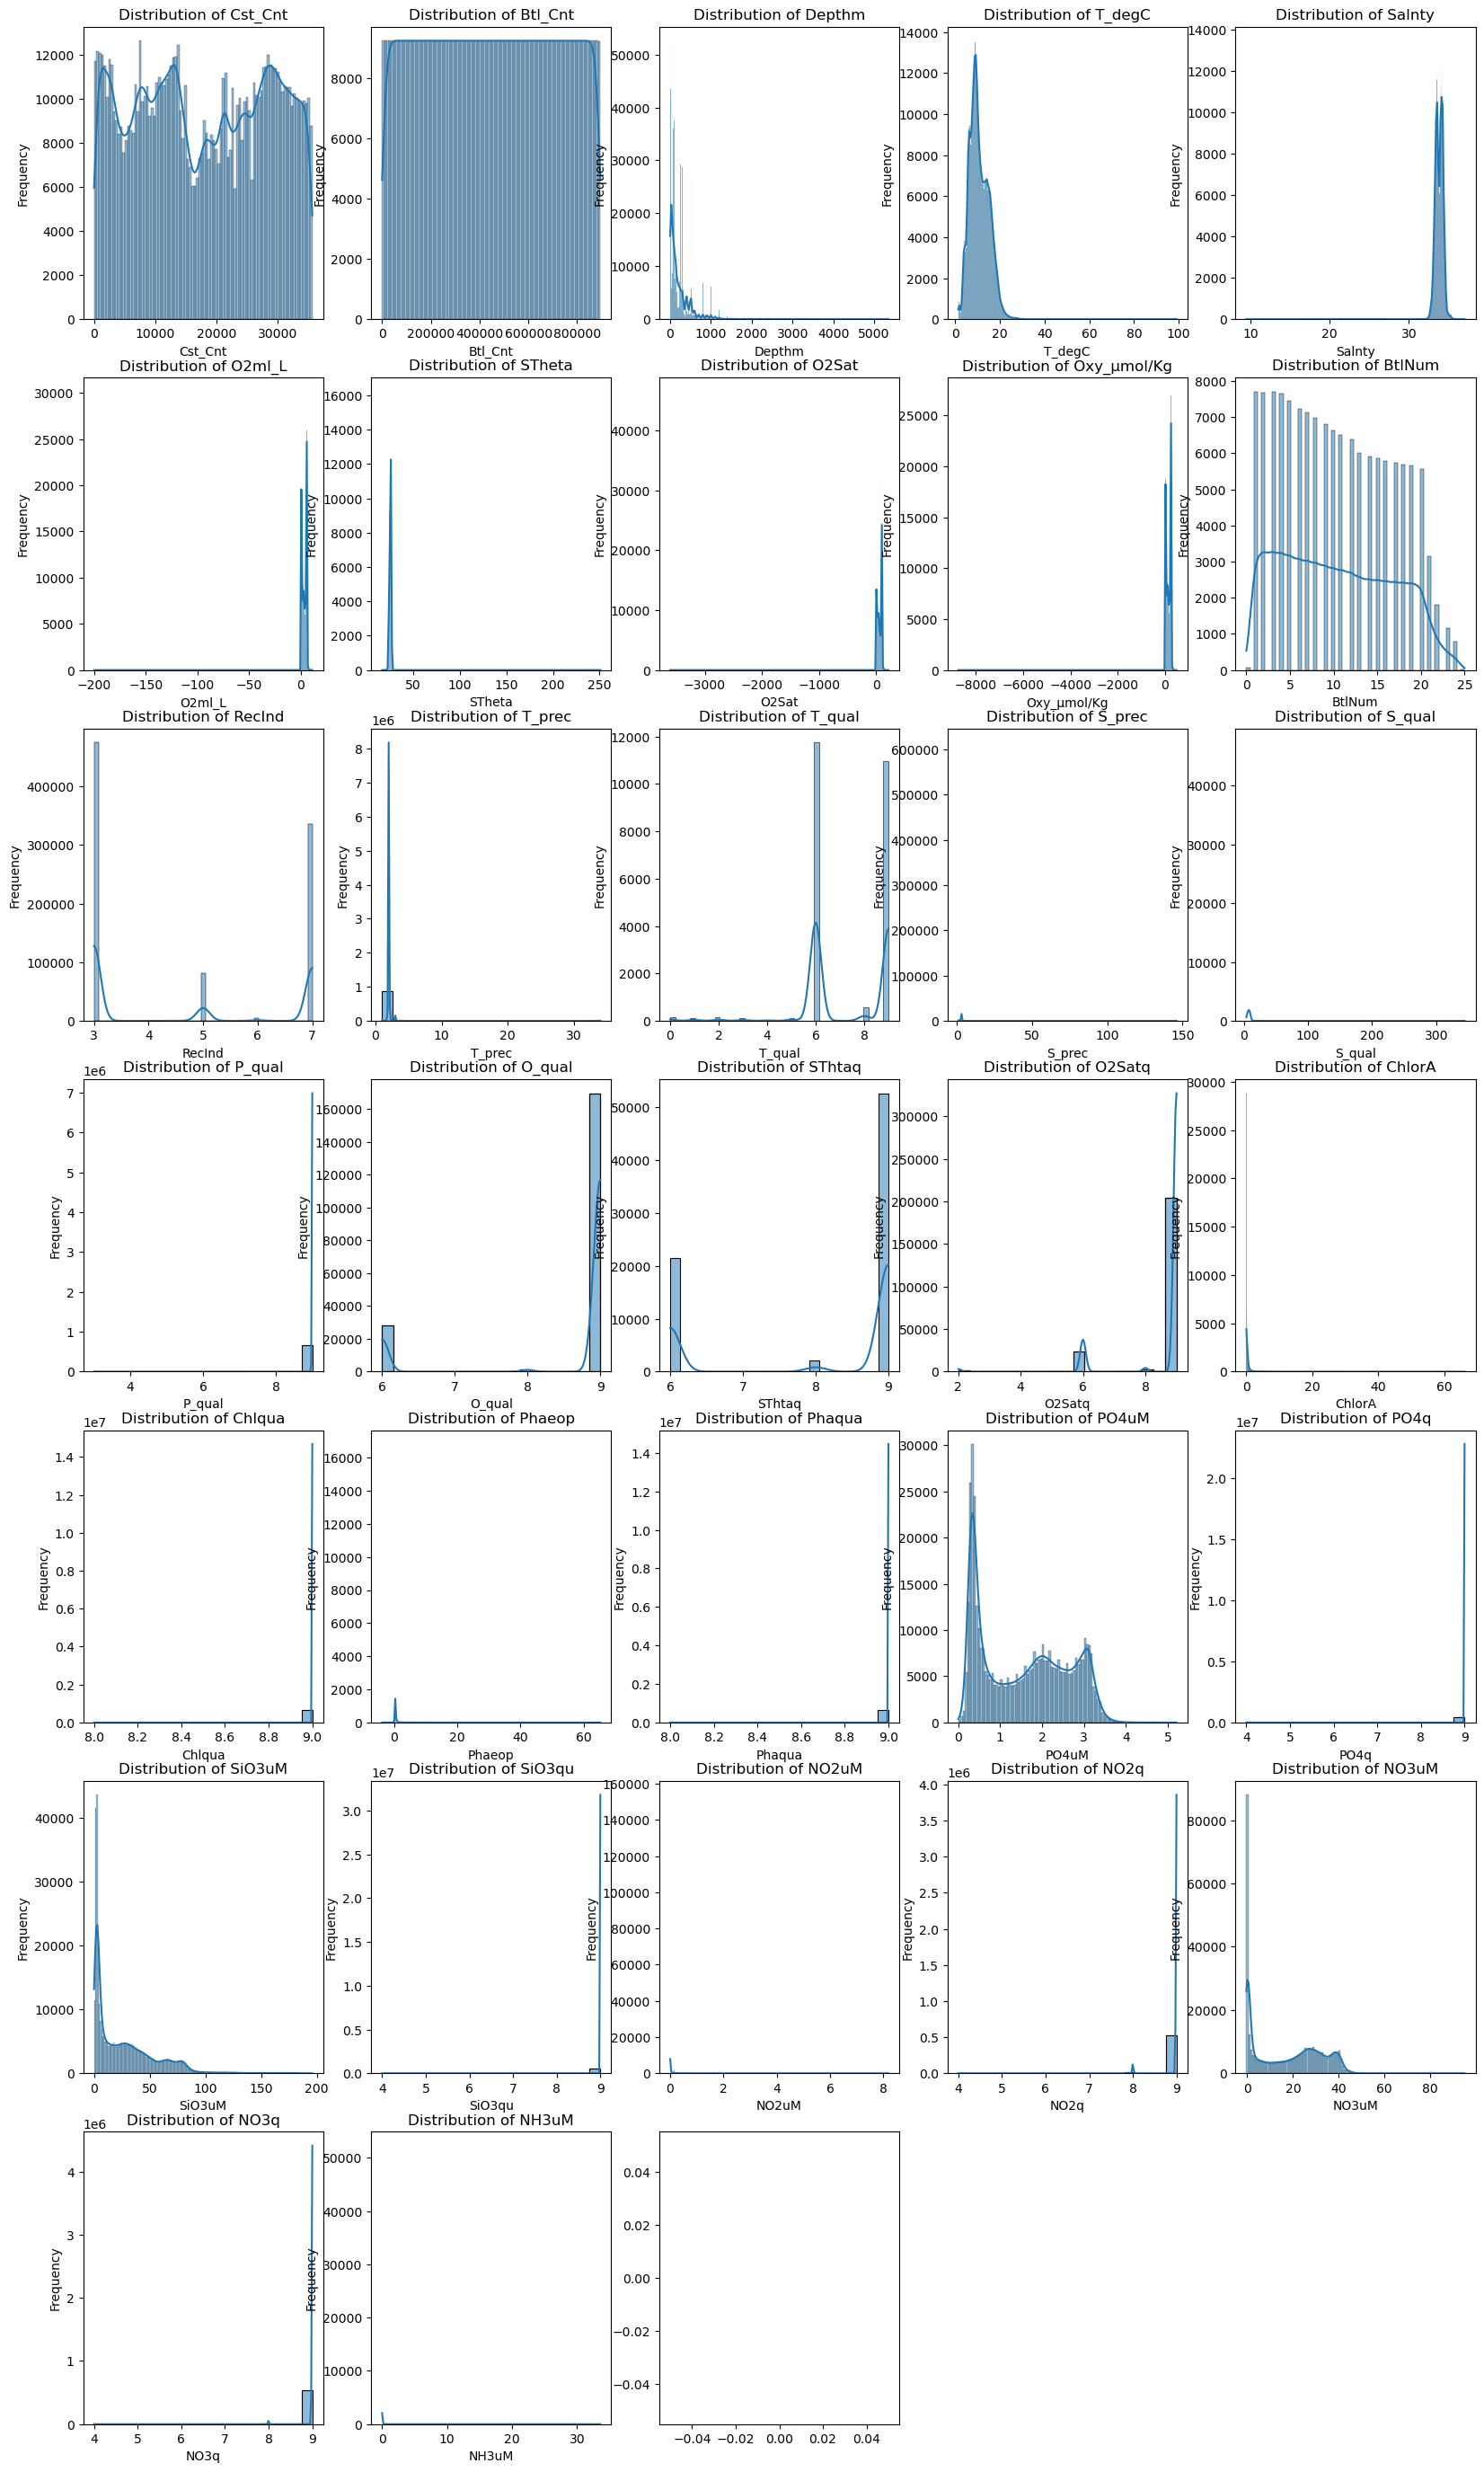

In [11]:
# Function to create distribution plots for all columns in a dataset
def plot_all_distributions(data, title):
    numeric_columns = data.select_dtypes(include=['number']).columns
    num_vars = len(numeric_columns)
    num_cols = 5
    num_rows = -(-num_vars // num_cols)  # Ceiling division to get number of rows

    plt.figure(figsize=(20, 5 * num_rows))
    for i, var in enumerate(numeric_columns):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.histplot(data[var].dropna(), kde=True)
        plt.title(f'Distribution of {var}')
        plt.xlabel(var)
        plt.ylabel('Frequency')

    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to include suptitle
    plt.show()

# Plot distributions for all numeric columns in both datasets
plot_all_distributions(bottle_data, 'Distribution Plots for All Numeric Variables in Bottle Dataset')
plot_all_distributions(cast_data, 'Distribution Plots for All Numeric Variables in Cast Dataset')

In [29]:
# Function to create a correlation matrix heatmap for a dataset without text annotations
def plot_correlation_matrix_no_text(data, title):
    numeric_columns = data.select_dtypes(include=['number']).columns
    plt.figure(figsize=(12, 10))
    sns.heatmap(data[numeric_columns].corr(), annot=False, cmap='coolwarm', vmin=1, vmax=-1)
    plt.title(title)
    plt.show()

# Plot correlation matrices for both datasets without number text
plot_correlation_matrix_no_text(bottle_data, 'Correlation Matrix of All Numeric Variables in Bottle Dataset')
plot_correlation_matrix_no_text(cast_data, 'Correlation Matrix of All Numeric Variables in Cast Dataset')

In [12]:
# Summary statistics

# Print summary statistics for all numeric columns in the Bottle dataset
print("Summary Statistics for Bottle Dataset:")
print(bottle_data.describe())

# Print a separator for clarity
print("\n" + "-"*50 + "\n")

# Print summary statistics for all numeric columns in the Cast dataset
print("Summary Statistics for Cast Dataset:")
print(cast_data.describe())

Summary Statistics for Bottle Dataset:
             Cst_Cnt        Btl_Cnt         Depthm         T_degC  \
count  895371.000000  895371.000000  895371.000000  884402.000000   
mean    17747.708684  447686.027682     224.366744      10.819050   
std     10574.444952  258471.536174     312.163785       4.230675   
min         1.000000       1.000000       0.000000       1.440000   
25%      8551.000000  223843.500000      45.000000       7.710000   
50%     17665.000000  447686.000000     125.000000      10.070000   
75%     27426.000000  671528.500000     300.000000      13.900000   
max     35644.000000  895398.000000    5351.000000      99.000000   

              Salnty         O2ml_L         STheta          O2Sat  \
count  848015.000000  725630.000000  842675.000000  690746.000000   
mean       33.828139       3.399955      25.813919      57.225728   
std         0.529472       2.084452       1.160761      37.321875   
min         9.500900    -200.222000      16.996010   -3605.2200